In [1]:
install.packages("tigris")
install.packages("sf")
install.packages("geojsonio")

Installing package into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'tigris' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kaiyan Zhang\AppData\Local\Temp\RtmpuIN6cG\downloaded_packages


Installing package into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'sf' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'sf'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Kaiyan Zhang\AppData\Local\R\win-library\4.5\00LOCK\sf\libs\x64\sf.dll to C:\Users\Kaiyan Zhang\AppData\Local\R\win-library\4.5\sf\libs\x64\sf.dll: Permission denied"
Warning message:
"restored 'sf'"



The downloaded binary packages are in
	C:\Users\Kaiyan Zhang\AppData\Local\Temp\RtmpuIN6cG\downloaded_packages


Installing package into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'geojsonio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kaiyan Zhang\AppData\Local\Temp\RtmpuIN6cG\downloaded_packages


In [2]:
library(tidyverse)
library(ggplot2)
library(tigris)
library(sf)
library(geojsonio)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.3.0
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.1.0     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'tigris' was built under R version 4.5.2"
To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.

Warning message:
"package 'sf' was built under R version 4.5.2"
Linking to GEOS 3.13.1, GDAL 3.11.4, PROJ 9.7.0; sf_use_s2() is TRUE

Warning message:
"package 'geojsonio' was built under R version 4.5.2"
Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


Attach

In [3]:
state_sf <- states(cb = TRUE) |>
    st_as_sf()|>
    # Filter to exclude the territories
    filter(!STUSPS %in% c("AS", "GU", "MP", "PR", "VI"))

head(state_sf, 10)

Retrieving data for the year 2024



  |======================================================================| 100%


,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,35,00897535,0400000US35,35,NM,New Mexico,00,314198519809,726531289,MULTIPOLYGON (((-109.0502 3...
2,46,01785534,0400000US46,46,SD,South Dakota,00,196341670967,3387563375,MULTIPOLYGON (((-104.0579 4...
3,06,01779778,0400000US06,06,CA,California,00,403673433805,20291632828,MULTIPOLYGON (((-118.6044 3...
4,21,01779786,0400000US21,21,KY,Kentucky,00,102266755818,2384136185,MULTIPOLYGON (((-89.40565 3...
5,01,01779775,0400000US01,01,AL,Alabama,00,131185561946,4581813708,MULTIPOLYGON (((-88.05338 3...
6,13,01705317,0400000US13,13,GA,Georgia,00,149485762701,4419221858,MULTIPOLYGON (((-81.27939 3...
7,05,00068085,0400000US05,05,AR,Arkansas,00,134658517854,3122715710,MULTIPOLYGON (((-94.61792 3...
8,42,01779798,0400000US42,42,PA,Pennsylvania,00,115881476238,3397613881,MULTIPOLYGON (((-80.51989 4...
9,29,01779791,0400000US29,29,MO,Missouri,00,178052403953,2487375487,MULTIPOLYGON (((-95.77355 4...


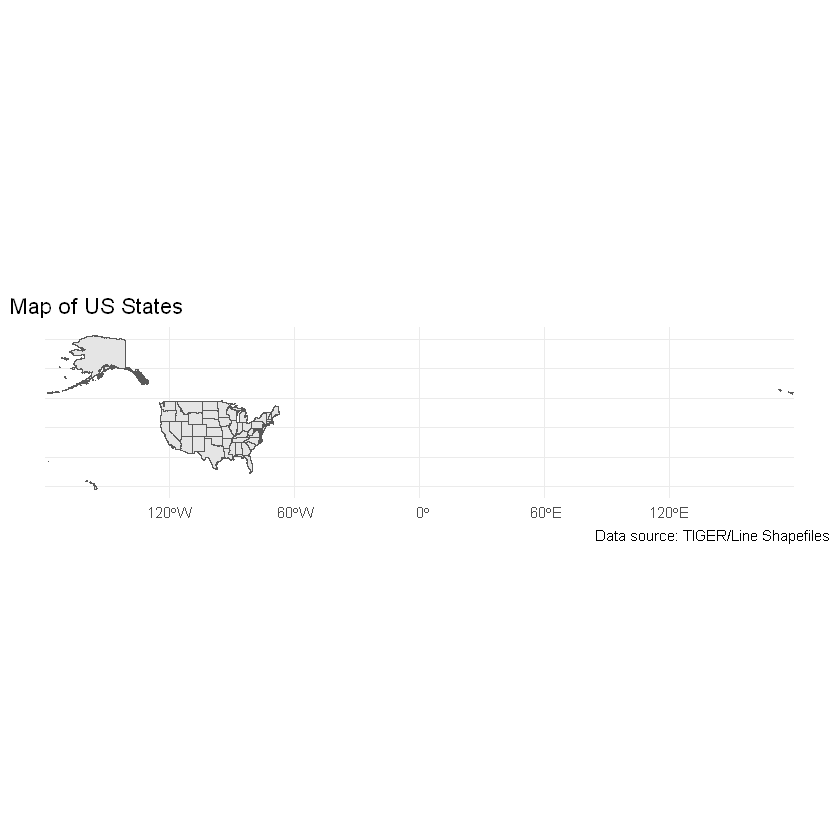

In [4]:
# Plot the states
ggplot(data = state_sf) +
    geom_sf() +
    theme_minimal() +
    labs(title = "Map of US States",
         caption = "Data source: TIGER/Line Shapefiles")

In [5]:
# Pull the shapefile for all places
state_names <- state_sf$STUSPS

for (state in state_names) {
    places_sf <- places(state = state, cb = TRUE) |>
        st_as_sf()
    # Join into one sf object
    if (state == state_names[1]) {
        all_places_sf <- places_sf
    } else {
        all_places_sf <- rbind(all_places_sf, places_sf)
    }
}

Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


Retrieving data for the year 2024



  |======================================================================| 100%


In [6]:
print(length(all_places_sf$NAME))

head(all_places_sf, 10)

[1] 32041


,STATEFP,PLACEFP,PLACENS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,35,83340,02413599,1600000US3583340,3583340,Wagon Mound,Wagon Mound village,NM,New Mexico,47,2620157,0,MULTIPOLYGON (((-104.7243 3...
2,35,33290,02413559,1600000US3533290,3533290,Hope,Hope village,NM,New Mexico,47,3168766,2000,MULTIPOLYGON (((-104.7785 3...
3,35,12150,02409985,1600000US3512150,3512150,Carlsbad,Carlsbad city,NM,New Mexico,25,81988151,709034,MULTIPOLYGON (((-104.2417 3...
4,35,62620,02413582,1600000US3562620,3562620,Reserve,Reserve village,NM,New Mexico,47,1442942,0,MULTIPOLYGON (((-108.7661 3...
5,35,70270,02413590,1600000US3570270,3570270,Santa Clara,Santa Clara village,NM,New Mexico,47,5154323,38905,MULTIPOLYGON (((-108.1665 3...
6,35,68150,02413587,1600000US3568150,3568150,San Jon,San Jon village,NM,New Mexico,47,7583595,0,MULTIPOLYGON (((-103.3579 3...
7,35,06830,02584055,1600000US3506830,3506830,Berino,Berino CDP,NM,New Mexico,57,2433929,0,MULTIPOLYGON (((-106.6341 3...
8,35,51840,02584163,1600000US3551840,3551840,Newkirk,Newkirk CDP,NM,New Mexico,57,2818424,0,MULTIPOLYGON (((-104.2851 3...
9,35,48425,02584154,1600000US3548425,3548425,Middle Frisco,Middle Frisco CDP,NM,New Mexico,57,1412773,142267,MULTIPOLYGON (((-108.7729 3...


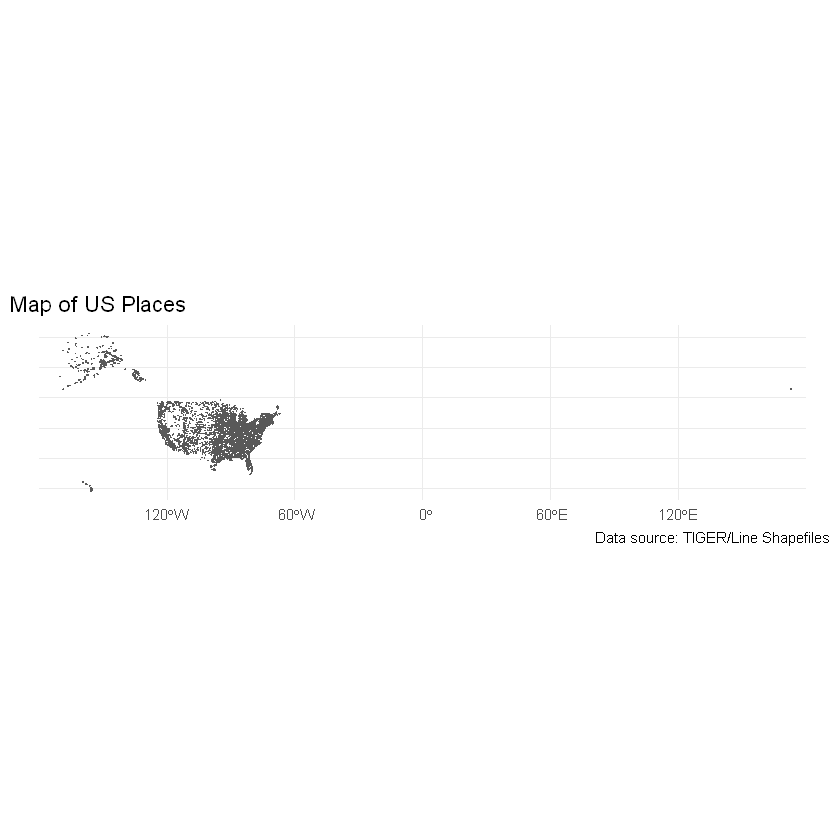

In [7]:
# Visualize all places
ggplot(data = all_places_sf) +
    geom_sf() +
    theme_minimal() +
    labs(title = "Map of US Places",
         caption = "Data source: TIGER/Line Shapefiles")

In [10]:
# Save the places as a GeoJSON file
# Make sure the format is correctly configured
geojsonio::geojson_write(all_places_sf,
                         file = "../data/us_places.geojson",
                         overwrite = TRUE)

Success! File is at ../data/us_places.geojson



<geojson-file>
  Path:       ../data/us_places.geojson
  From class: geo_list